# Hydraulic head change training 

## Preliminaries

In [1]:
# Imports
import networkx as nx
from sklearn.model_selection import train_test_split

import plotly.graph_objects as go

## Utilities
import utils.head_change_utils as utils

# Open the file and load the file
yaml_path = 'config_file.yaml'
yaml_data = utils.load_yaml(yaml_path)

# Directories

simulations_path = yaml_data['simulations_path']
inp_path =  yaml_data['inp_path']
rain_path = simulations_path + '\\block' + '\\block.dat'
heads_path = simulations_path + '\\block' + '\\rainblock_head_TuindorpRP.pk'

## Read data from rainfall and hydraulic head

In [ ]:
#Rainfall
rainfall_raw_data = utils.get_rain_in_pandas(rain_path)

#Hydraulic head
head_raw_data = utils.get_info_from_pickle(heads_path)
head_raw_data.columns = head_raw_data.columns.str.replace("_Hydraulic_head", "")
head_raw_data.columns = head_raw_data.columns.str.replace("node_", "")

In [ ]:
#Periods without rain
# dry_periods_index = rainfall_raw_data[rainfall_raw_data['value']==0].index
dry_periods_index = [[12, 13, 14, 15, 16, 17],          #First dry period
                     [24, 25, 26, 27, 28, 29, 30, 31,], #Second dry period
                     [38, 39, 40, 41, 42, 43, 44, 45],  #Third dry period
                     [52, 53, 54, 55, 56, 57],          #Fourth dry period
                     [64, 65, 66, 67, 68, 69],          #Fifth dry period
                     [76, 77, 78, 79, 80, 81, 82, 83, 84] #Last dry period
                    ]

In [ ]:
x_values = []
y_values = []

for dry_period in dry_periods_index:
    heads_no_rain = head_raw_data.iloc[list(dry_period), :]
    initial_heads, next_heads = utils.get_h0_h1_couples(heads_no_rain)
    
    x_values.extend(initial_heads)
    y_values.extend(next_heads)



## Separate samples in training/validation/testing

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

## Data preprocessing

### Normalization

In [ ]:
max, min = utils.get_max_and_min(X_train + y_train) #It considers all heads with the same scaling

normalized_x = utils.normalize_sample_values(X_train, max, min)
normalized_y = utils.normalize_sample_values(y_train, max, min)


### Visualization

In [ ]:
# For a single node
single_node_x = []
single_node_y = []
node_name = 'j_90383'
length_database = len(normalized_x) #same as y_train

for i in range(length_database):
    single_node_x.append(normalized_x[i][node_name])
    single_node_y.append(normalized_y[i][node_name])



In [ ]:
fig = go.Figure()
scatter_one_node_x_y=utils.get_scatter_trace(single_node_x, single_node_y)
fig.add_trace(scatter_one_node_x_y)

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
  )
fig.update_layout(
    width = 500,
    height = 500,
    title = "%s Head changes" % (node_name)
)

fig.update_layout(
        shapes=[
            dict(
                type= 'line',
                y0= 0, 
                y1= 1, 
                x0= 0, 
                x1= 1
            )
        ])

fig.show()

## Machine Learning

### Model definition

In [2]:
inp_lines = utils.get_lines_from_textfile(inp_path)
G = utils.inp_to_G(inp_lines)

The file does not have pumps. A handled exception occured because of '[PUMPS]\n'
The file does not have pumps. A handled exception occured because of '[PUMPS]\n'
The file does not have orifices. A handled exception occured because of '[ORIFICES]\n'
The file does not have weirs. A handled exception occured because of '[WEIRS]\n'


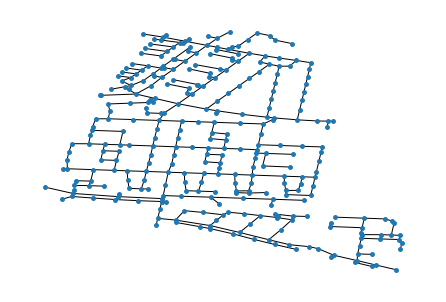

In [19]:
#Draw graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos = pos, node_size=15)

### Model training

### Model validation

### Model testing

## Predictions visualization

## Export model

# Scratchpad

In [22]:
def get_node_coordinates(lines, inp_dict):
    
    index = inp_dict['[COORDINATES]\n']+3
    line = lines[index]
    pos = {}
    while line != '\n':
        name_node, x_coord, y_coord = line.split()
        print(line)
        # pos[]
    

In [3]:
inp_dict = utils.get_headers_from_inp(inp_lines)
get_node_coordinates(inp_lines, inp_dict)

NameError: name 'get_node_coordinates' is not defined